# Project: Investigate a Dataset (Programme for International Student Assessment!)
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#Prediction">Prediction</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

## Introduction

The Program for International Student Assessment (PISA) is an international assessment that measures 15-year-old students’ reading, mathematics, and science literacy every three years. The major domain of study rotate between reading, math, and science in each cycle. And PISA 2012 is the latest year that focus on student math performance, so we will choose this dataset for analysis. All dataset can be download from the program website, and they are coordinated by the Organization for Economic Cooperation and Development (OECD). 
Test Structure:

Student:
1. a two-hour handwritten test about reading, math, and science
2. a questionnaire on their background including learning habits, motivation, and family. 

School directors:
1. a questionnaire describing school demographic, funding and so on. 

Through this data analysis, we would like to provide some insights about what kind of students’ characters would help them succeed in the academic performance.



In [1]:
#load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling
Goal: In this section of the report, we will load in the PISA data, economic data by country, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [2]:
#load PISA 2012 data
df=pd.read_csv('pisa2012.csv',encoding='latin1',dtype={15: str, 16: str, 17: str, 21: str, 22: str, 23: str, 24: str, 25: str, 26: str, 37: str,
           45: str, 65: str, 123: str, 156: str, 157: str, 158: str, 159: str, 160: str, 161: str,
           162: str, 163: str, 164: str, 165: str, 166: str, 167: str, 168: str, 169: str, 170: str,
           171: str, 284: str, 285: str, 286: str, 287: str, 288: str, 289: str, 290: str, 291: str,
           292: str, 293: str, 294: str, 295: str, 296: str, 297: str, 298: str, 299: str, 300: str,
           301: str, 302: str, 303: str, 307: str, 308: str, 309: str, 310: str, 311: str, 312: str,
           313: str, 314: str, 315: str, 316: str, 317: str, 318: str, 319: str, 320: str, 321: str,
           322: str, 323: str, 324: str, 325: str, 326: str, 327: str, 328: str, 329: str, 330: str,
           331: str, 332: str, 333: str, 334: str, 335: str, 336: str, 337: str, 338: str, 339: str,
           340: str, 341: str, 342: str, 343: str, 344: str, 345: str, 346: str, 347: str, 348: str,
           349: str, 350: str, 351: str, 352: str, 353: str, 354: str, 355: str, 356: str, 357: str,
           376: str, 377: str, 378: str, 379: str, 380: str, 381: str, 382: str, 383: str, 384: str,
           385: str, 386: str, 387: str, 388: str, 389: str, 390: str, 391: str, 392: str, 393: str,
           394: str, 395: str, 396: str, 397: str, 398: str, 399: str, 400: str, 401: str, 402: str,
           403: str, 475: str, 30: str, 31: str, 36: str, 155: str}
    )

In [3]:
df.shape

(485490, 636)

In [4]:
df.head(2)

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13


This dataset contains information from 485,490 students and 646 features which covers nearly every aspects of the education system. For specific focus, we can just extract the information related to our projects for data analysis. 

In [5]:
GDP = pd.read_csv('GDP.csv',sep=',',encoding='latin1')
GDP.rename(columns={'Country Code':'ISO ALPHA-3 code'}, inplace=True)

GDP.head(2)

,Country Name,ISO ALPHA-3 code,Indicator Name,GDP_2012,GDP_per_capita_2012
0,Aruba,ABW,GDP (current US$),2.534637e+09,24713.698050
1,Afghanistan,AFG,GDP (current US$),2.000162e+10,641.872034


In [6]:
df_code=pd.read_csv('df_code.csv', sep='\t', encoding='utf-8')
df_code['CNT']=df_code['Country or area name']
df_code['CNT'].astype('str')
df_code.head(2)



,Country or area name,ISO ALPHA-3 code,CNT
0,Afghanistan,AFG,Afghanistan
1,Åland Islands,ALA,Åland Islands


### Data Cleaning

since we are interested in the MATH performance for students from different countries and areas, we create a new dataframe just focusing on Math score.

In [7]:
#creat a dataframe with only math score
df_MATH = df[['CNT','NC','ST04Q01','PV1MATH','PV2MATH','PV3MATH','PV4MATH','PV5MATH']]
df_MATH.to_csv('df_MATH.csv', sep='\t', encoding='utf-8',index=False)

In [8]:
# load MATH score
df_MATH= pd.read_csv('df_MATH.csv',sep='\t', encoding='utf-8')
df_MATH.head(2)

,CNT,NC,ST04Q01,PV1MATH,PV2MATH,PV3MATH,PV4MATH,PV5MATH
0,Albania,Albania,Female,406.8469,376.4683,344.5319,321.1637,381.9209
1,Albania,Albania,Female,486.1427,464.3325,453.4273,472.9008,476.0165


In [9]:
#calculate the average math score
col = df_MATH.loc[: , "PV1MATH":"PV5MATH"]
df_MATH['MATH'] = col.mean(axis=1) 
df_MATH.drop(['PV1MATH','PV2MATH','PV3MATH','PV4MATH','PV5MATH'],axis=1,inplace=True)
df_MATH.head(2)

,CNT,NC,ST04Q01,MATH
0,Albania,Albania,Female,366.18634
1,Albania,Albania,Female,470.56396


In [10]:
#check country name in column 'CNT'
df_MATH['CNT'].unique(),df_MATH['CNT'].nunique()

(array(['Albania', 'United Arab Emirates', 'Argentina', 'Australia',
        'Austria', 'Belgium', 'Bulgaria', 'Brazil', 'Canada',
        'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic',
        'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
        'United Kingdom', 'Greece', 'Hong Kong-China', 'Croatia',
        'Hungary', 'Indonesia', 'Ireland', 'Iceland', 'Israel', 'Italy',
        'Jordan', 'Japan', 'Kazakhstan', 'Korea', 'Liechtenstein',
        'Lithuania', 'Luxembourg', 'Latvia', 'Macao-China', 'Mexico',
        'Montenegro', 'Malaysia', 'Netherlands', 'Norway', 'New Zealand',
        'Peru', 'Poland', 'Portugal', 'Qatar', 'China-Shanghai',
        'Perm(Russian Federation)', 'Florida (USA)', 'Connecticut (USA)',
        'Massachusetts (USA)', 'Romania', 'Russian Federation',
        'Singapore', 'Serbia', 'Slovak Republic', 'Slovenia', 'Sweden',
        'Chinese Taipei', 'Thailand', 'Tunisia', 'Turkey', 'Uruguay',
        'United States of A

Florida(USA), Connecticut(USA), and Massachusetts(USA) are states of the USA, we will make them into one category later on.

In [11]:
#clean CN column to match the country name in the GDP dataset
df_MATH['NC']=df_MATH['NC'].replace('United Kingdom (excl.Scotland) ','United Kingdom')
df_MATH['NC']=df_MATH['NC'].replace('United Kingdom (Scotland)','United Kingdom')
df_MATH['NC']=df_MATH['NC'].str.strip()
df_MATH['NC'].unique(),df_MATH['NC'].nunique()


(array(['Albania', 'United Arab Emirates', 'Argentina', 'Australia',
        'Austria', 'Belgium', 'Bulgaria', 'Brazil', 'Canada',
        'Switzerland', 'Chile', 'Colombia', 'Costa Rica', 'Czech Republic',
        'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France',
        'United Kingdom', 'Greece', 'Hong Kong-China', 'Croatia',
        'Hungary', 'Indonesia', 'Ireland', 'Iceland', 'Israel', 'Italy',
        'Jordan', 'Japan', 'Kazakhstan', 'Republic of Korea',
        'Liechtenstein', 'Lithuania', 'Luxembourg', 'Latvia',
        'Macao-China', 'Mexico', 'Montenegro', 'Malaysia', 'Netherlands',
        'Norway', 'New Zealand', 'Peru', 'Poland', 'Portugal', 'Qatar',
        'China (Shanghai)', 'Perm (Russian Federation)',
        'United States of America', 'Romania', 'Russian Federation',
        'Singapore', 'Serbia', 'Slovak Republic', 'Slovenia', 'Sweden',
        'Chinese Taipei', 'Thailand', 'Tunisia', 'Turkey', 'Uruguay',
        'Viet Nam'], dtype=object), 65)

In [12]:
#group MATH by country name to get the average math score
MATH = df_MATH.groupby( 'NC' )['MATH'].mean().reset_index(name='MATH')
MATH['country']=MATH['NC'].copy()
MATH['country']=MATH['country'].replace('China (Shanghai)','China')
MATH['country']=MATH['country'].replace('Hong Kong-China','Hong Kong Special Administrative Region of China')
MATH['country']=MATH['country'].replace('Macao-China','Macao Special Administrative Region of China')
MATH['country']=MATH['country'].replace('Perm (Russian Federation)','Russian Federation')
MATH['country']=MATH['country'].replace('United Kingdom','United Kingdom of Great Britain and Northern Ireland')
MATH.rename(columns={'country':'CNT'}, inplace=True)
MATH.head(2)

,NC,MATH,CNT
0,Albania,394.878912,Albania
1,Argentina,395.635711,Argentina


In [13]:
#join GDP with df_code to get country code
GDP1=GDP.join(df_code.set_index('ISO ALPHA-3 code'),on='ISO ALPHA-3 code',how='inner')
GDP1.drop(['Country Name','Country or area name'],axis=1,inplace=True)
GDP1.head(5)

,ISO ALPHA-3 code,Indicator Name,GDP_2012,GDP_per_capita_2012,CNT
0,ABW,GDP (current US$),2.534637e+09,24713.698050,Aruba
1,AFG,GDP (current US$),2.000162e+10,641.872034,Afghanistan
2,AGO,GDP (current US$),1.280000e+11,5100.095808,Angola
3,ALB,GDP (current US$),1.231978e+10,4247.614342,Albania
4,AND,GDP (current US$),3.164615e+09,38392.943900,Andorra


In [14]:
MATH_GDP=MATH.join(GDP1.set_index('CNT'),on='CNT',how='inner')
MATH_GDP.head(2)

,NC,MATH,CNT,ISO ALPHA-3 code,Indicator Name,GDP_2012,GDP_per_capita_2012
0,Albania,394.878912,Albania,ALB,GDP (current US$),1.231978e+10,4247.614342
1,Argentina,395.635711,Argentina,ARG,GDP (current US$),5.460000e+11,13082.664330


In [15]:
MATH_GDP.shape

(63, 7)

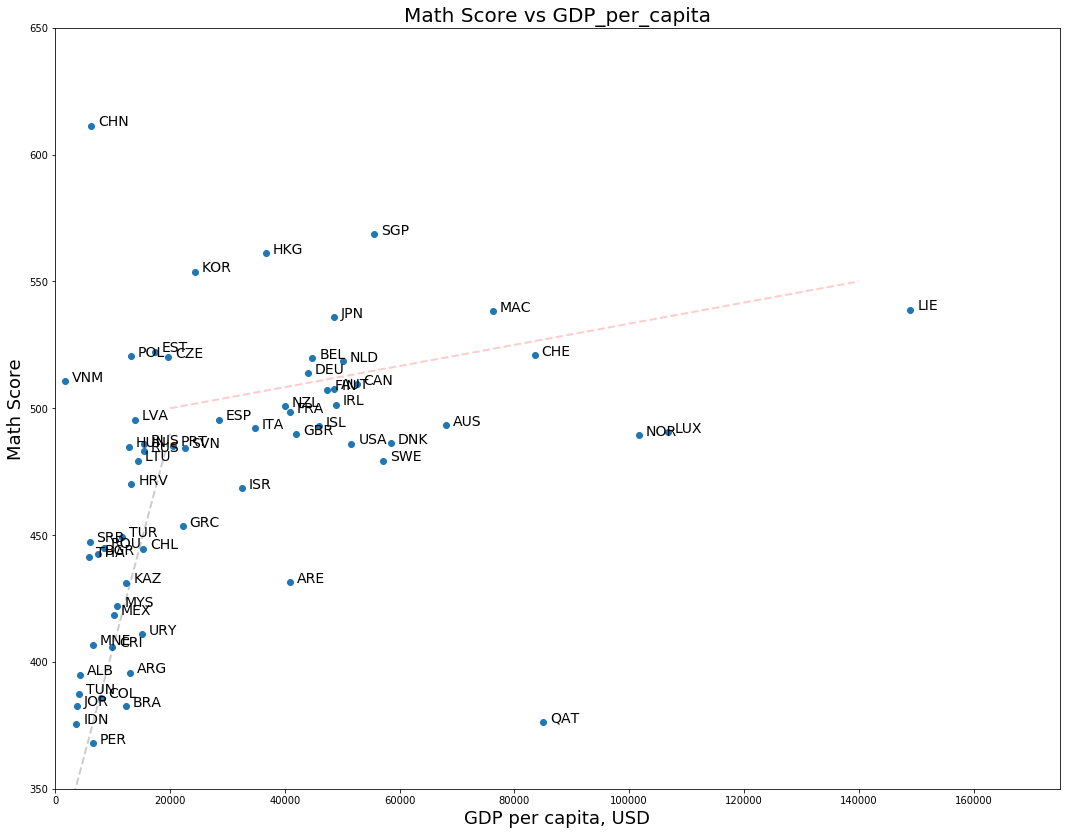

In [16]:
plt.figure(figsize=[18,14])
GDP2=MATH_GDP[['ISO ALPHA-3 code','GDP_per_capita_2012','MATH']].copy()
ax = GDP2.set_index('GDP_per_capita_2012')['MATH'].plot(style='o')
def label_point(x, y, val, ax):
    a = pd.concat({'GDP_per_capita_2012': x, 'MATH': y, 'ISO ALPHA-3 code': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['GDP_per_capita_2012']+1200, point['MATH'], str(point['ISO ALPHA-3 code']),fontsize=14)
        
        
label_point(GDP2.GDP_per_capita_2012,GDP2.MATH, GDP2['ISO ALPHA-3 code'], ax)   
plt.xlabel('GDP per capita, USD',fontsize=18)
plt.ylabel('Math Score',fontsize=18)
plt.plot([20000,140000], [500, 550],color='red', linestyle='--', linewidth=2,alpha=0.2)
plt.plot([0,20000], [320, 490],color='black', linestyle='--', linewidth=2,alpha=0.2)
plt.rc('xtick', labelsize=16)
plt.rc('ytick', labelsize=16)
plt.xlim(0,175000)
plt.ylim(350,650)
plt.title('Math Score vs GDP_per_capita',fontsize=20);



At first glance, it might seem that a country’s wealth is related to how well it does in PISA. Among moderately wealthy economics whose per capita GDP is up to around USD 20000, the greater the country’s wealth, the higher its mean score on the PISA math test. But PISA results suggest that above this threshold of USD 20000 in per capita GDP, national wealth is no longer a predictor of a country’s mean performance in PISA.

Money alone can’t buy a good education system. Strong performers in PISA are those countries and economies that believe  and act on the believe that all children can succeed in school. 

Students are the core elements in the whole education system. How do students think about study? This question might be the most important thing that influence their performance at school.


<a id='eda'></a>
## Exploratory Data Analysis
> **Goals**: In this section of the report, we will analyze the data set based different features, including Age, Lead time, Scholarship(government supported), and Gender and see if there is some clear trend or correlations between these features and show up appointments. The feature analyzed is as following:


In [17]:
df_usa = df[df['CNT'].isin(['Florida (USA)', 'Connecticut (USA)','Massachusetts (USA)','United States of America'])]
df_usa.to_csv('df_usa.csv', sep='\t', encoding='utf-8')

In [18]:
df_usa= pd.read_csv('df_usa.csv',sep='\t', encoding='utf-8' )

In [19]:
df_usa.head(2)

,Unnamed: 0,Unnamed: 0.1,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,407155,407156,Florida (USA),8400100,QUA9797,Non-OECD,United States of America,1,1,9,...,46.0693,46.8965,137.3714,46.8965,139.2289,50.5001,46,2,0.5315,22NOV13
1,407156,407157,Florida (USA),8400100,QUA9797,Non-OECD,United States of America,1,2,11,...,42.6962,42.6962,128.0887,42.6962,128.0887,42.6962,46,2,0.4899,22NOV13


In [20]:
col = df_usa.loc[: , "PV1MATH":"PV5MATH"]
df_usa['MATH'] = col.mean(axis=1)

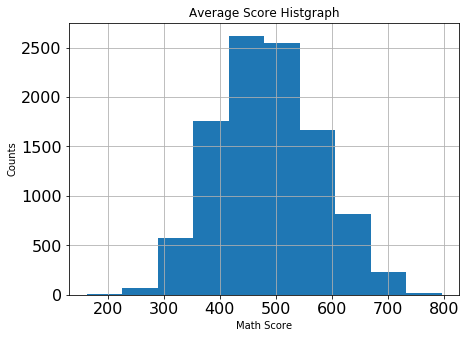

In [21]:
#plot math score histgraph
plt.figure(figsize=[7,5])
df_usa['MATH'].hist();
plt.xlabel('Math Score')
plt.ylabel('Counts')
plt.title('Average Score Histgraph');


1. Motivation calibration : Ability to identify what motivation looks like in day-to-day life
2. Text anxiety : School-work and test-related anxiety
3. Motivation : Self-identified desire to suceed
4. Instrumental motivation : Belief that success in school will lead to better career opportunities

#### Student Information

* CNT: Country 
* ST04Q01: Gender

#### Student Mathematics Scores

* PV1MATH: Overall Mathematics Score



### Student's Attitude Towards Mathematics

#### Instrumental Motivation
* ST29Q02: Worthwhile for Work
* ST29Q05: Worthwhile for Career Chances
* ST29Q07: Important for Future Study
* ST29Q08: Helps to Get a Job

#### Math Anxiety
* ST42Q01: Worry That It Will Be Difficult
* ST42Q03: Get Very Tense
* ST42Q05: Get Very Nervous
* ST42Q08: Feel Helpless
* ST42Q10: Worry About Getting Poor

#### Math Self-Concept
* ST42Q02: Not Good at Maths
* ST42Q04: Get Good (Grades)
* ST42Q06: Learn Quickly
* ST42Q07: One of Best Subjects
* ST42Q09: Understand Difficult Work

#### Math Interest
* ST29Q01: Enjoy Reading
* ST29Q03: Look Forward to Lessons
* ST29Q04: Enjoy Maths
* ST29Q06: Interested

#### Math Work Ethic
* ST46Q01: Homework Completed in Time
* ST46Q02: Work Hard on Homework
* ST46Q03: Prepared for Exams
* ST46Q04: Study Hard for Quizzes
* ST46Q05: Study Until I Understand Everything
* ST46Q06: Pay Attention in Classes
* ST46Q07: Listen in Classes
* ST46Q08: Avoid Distractions When Studying
* ST46Q09: Keep Work Organized

#### Math Behaviour
* ST49Q01: Talk about Maths with Friends
* ST49Q02: Help Friends with Maths
* ST49Q03: (Extracurricular) Activity
* ST49Q04: Participate in Competitions
* ST49Q05: Study More Than 2 Extra Hours a Day
* ST49Q06: Play Chess
* ST49Q07: Computer programming
* ST49Q09: Participate in Math Club

### Instumental Motivation
From these feature study, we could find out whether or not students have strong motivation towards studying math.

In [22]:
#Instrumental Motivation
'''ST29Q02: Worthwhile for Work
ST29Q05: Worthwhile for Career Chances
ST29Q07: Important for Future Study
ST29Q08: Helps to Get a Job'''

motivation=['ST29Q02','ST29Q05','ST29Q07','ST29Q08']

In [23]:
df_motivation = df_usa[['ST29Q02','ST29Q05','ST29Q07','ST29Q08','MATH']].copy()
df_motivation.dropna(axis=0,inplace=True)
df_motivation=df_motivation.rename(columns={'ST29Q02':'Worthwhile for Work',
                                           'ST29Q05':'Worthwhile for Career Chances',
                                           'ST29Q07':'Important for Future Study',
                                           'ST29Q08':'Helps to Get a Job'})
df_motivation.shape


(6653, 5)

In [24]:
df_motivation=df_motivation.copy()
df_motivation=pd.melt(df_motivation,id_vars='MATH',var_name='Q',value_name='A')

In [25]:
#count question answers
df_motivation_counts=df_motivation.groupby(['Q','A']).size().unstack()
cols=['Strongly agree','Agree','Disagree','Strongly disagree']
df_motivation_counts =df_motivation_counts[cols]

#calculate average math score
df_motivation_MATH=df_motivation.groupby(['Q','A'])['MATH'].mean().unstack()
df_motivation_MATH =df_motivation_MATH[cols]


Text(0.5, 0, 'Questions')

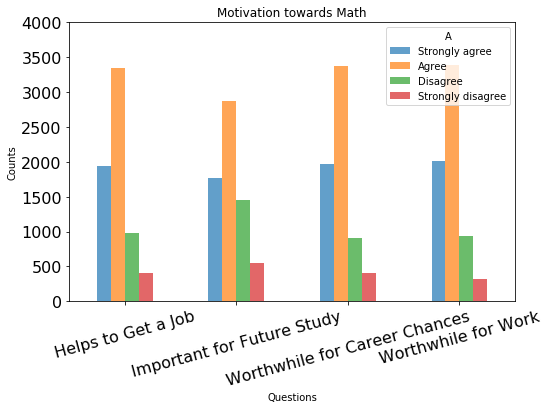

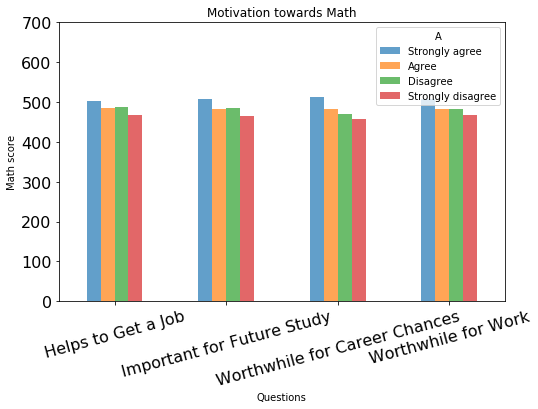

In [26]:
fig=plt.figure(figsize=[8,5])
ax=fig.add_axes([.125,.125,.775,.775])
df_motivation_counts.plot(kind='bar',ax=ax,alpha=0.7)
plt.ylabel('Counts')
plt.xticks(rotation=15);
plt.title('Motivation towards Math')
plt.xlabel('Questions')
plt.ylim(0,4000)

fig=plt.figure(figsize=[8,5])
ax=fig.add_axes([.125,.125,.775,.775])
df_motivation_MATH.plot(kind='bar',ax=ax,alpha=0.7)
plt.xticks(rotation=15)
plt.ylabel('Math score')
plt.ylim(0,700);
plt.title('Motivation towards Math')
plt.xlabel('Questions')



Motivation has a positive effect on students' math score. If they believe that math is important for their future study, work and career chances, they tend to get a higher math score.

### Math Anxiety
Math anxiety will investigate whether they are worried about their math test.

In [27]:
#Math Anxiety
#ST42Q01: Worry That It Will Be Difficult
#ST42Q03: Get Very Tense
#ST42Q05: Get Very Nervous
#ST42Q08: Feel Helpless
#ST42Q10: Worry About Getting Poor
anxiety=['ST42Q01','ST42Q03','ST42Q05','ST42Q08','ST42Q10']


In [28]:
df_anxiety = df_usa[['ST42Q01','ST42Q03','ST42Q05','ST42Q08','ST42Q10','MATH']].copy()
df_anxiety.dropna(axis=0,inplace=True)
df_anxiety=df_anxiety.rename(columns={'ST42Q01': 'Worry That It Will Be Difficult',
                                            'ST42Q03': 'Get Very Tense',
                                            'ST42Q05': 'Get Very Nervous',
                                            'ST42Q08': 'Feel Helpless',
                                            'ST42Q10': 'Worry About Getting Poor'})
df_anxiety.shape


(6590, 6)

In [29]:
df_anxiety=df_anxiety.copy()
df_anxiety=pd.melt(df_anxiety,id_vars='MATH',var_name='Q',value_name='A')

In [30]:
#count question answers
df_anxiety_counts=df_anxiety.groupby(['Q','A']).size().unstack()
cols=['Strongly agree','Agree','Disagree','Strongly disagree']
df_anxiety_counts =df_anxiety_counts[cols]

#calculate average math score
df_anxiety_MATH=df_anxiety.groupby(['Q','A'])['MATH'].mean().unstack()
df_anxiety_MATH =df_anxiety_MATH[cols]


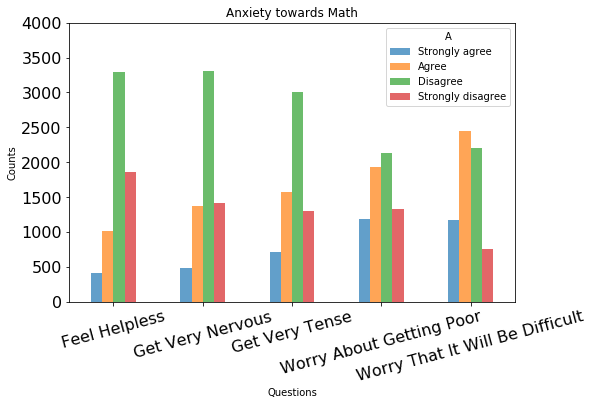

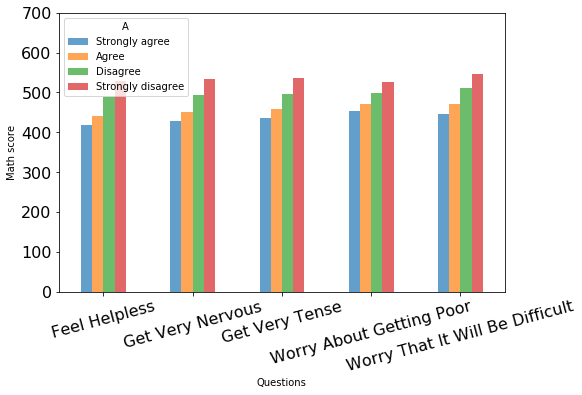

In [31]:
fig=plt.figure(figsize=[8,5])
ax=fig.add_axes([.125,.125,.775,.775])
df_anxiety_counts.plot(kind='bar',ax=ax,alpha=0.7)
plt.ylabel('Counts')
plt.xticks(rotation=15);
plt.xlabel('Questions');
plt.ylim(0,4000);
plt.title('Anxiety towards Math')

fig=plt.figure(figsize=[8,5])
ax=fig.add_axes([.125,.125,.775,.775])
df_anxiety_MATH.plot(kind='bar',ax=ax,alpha=0.7)
plt.xticks(rotation=15)
plt.ylabel('Math score')
plt.ylim(0,700);
plt.xlabel('Questions');


Math anxiety has a negative effect on their math test. If they worried too much about their exam, they tend to get lower score.

### Math Self-Concept

In [32]:
#Math Self-Concept
#ST42Q02: Not Good at Maths
#ST42Q04: Get Good (Grades)
#ST42Q06: Learn Quickly
#ST42Q07: One of Best Subjects
#ST42Q09: Understand Difficult Work
self=['ST42Q02','ST42Q04','ST42Q06','ST42Q07','ST42Q09']

In [33]:
df_self = df_usa[['ST42Q02','ST42Q04','ST42Q06','ST42Q07','ST42Q09','MATH']].copy()
df_self.dropna(axis=0,inplace=True)
df_self=df_self.rename(columns={'ST42Q02': 'Not Good at Maths',
                                      'ST42Q04':'Get Good (Grades)',
                                      'ST42Q06':'Learn Quickly',
                                      'ST42Q07':'One of Best Subjects',
                                      'ST42Q09':'Understand Difficult Work'})
df_self.shape

(6599, 6)

In [34]:

df_self=pd.melt(df_self,id_vars='MATH',var_name='Q',value_name='A')

In [35]:
#count question answers
df_self_counts=df_self.groupby(['Q','A']).size().unstack()
cols=['Strongly agree','Agree','Disagree','Strongly disagree']
df_self_counts =df_self_counts[cols]

#calculate average math score
df_self_MATH=df_self.groupby(['Q','A'])['MATH'].mean().unstack()
df_self_MATH =df_self_MATH[cols]

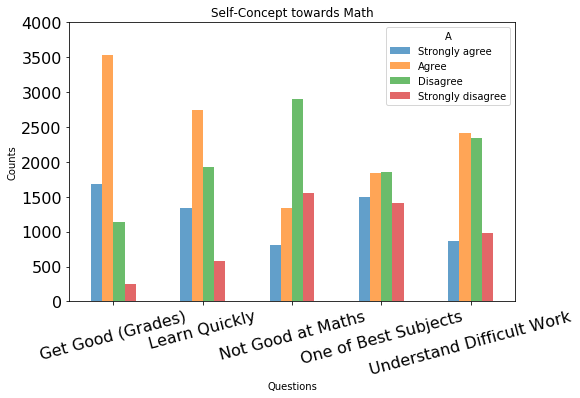

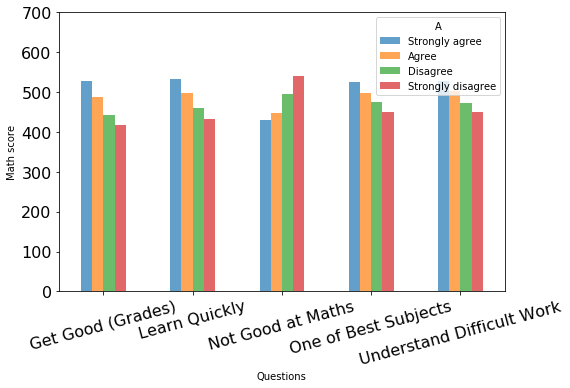

In [36]:
fig=plt.figure(figsize=[8,5])
ax=fig.add_axes([.125,.125,.775,.775])
df_self_counts.plot(kind='bar',ax=ax,alpha=0.7)
plt.ylabel('Counts')
plt.xticks(rotation=15);
plt.xlabel('Questions');
plt.ylim(0,4000);
plt.title('Self-Concept towards Math')

fig=plt.figure(figsize=[8,5])
ax=fig.add_axes([.125,.125,.775,.775])
df_self_MATH.plot(kind='bar',ax=ax,alpha=0.7)
plt.xticks(rotation=15)
plt.ylabel('Math score')
plt.ylim(0,700);
plt.xlabel('Questions');

### Math Interest

In [37]:
#Math Interest
#ST29Q01: Enjoy Reading
#ST29Q03: Look Forward to Lessons
#ST29Q04: Enjoy Maths
#ST29Q06: Interested
interest=['ST29Q01','ST29Q03','ST29Q04','ST29Q06']


In [38]:
df_interest = df_usa[['ST29Q01','ST29Q03','ST29Q04','ST29Q06','MATH']].copy()
df_interest.dropna(axis=0,inplace=True)
df_interest=df_interest.rename(columns={'ST29Q01':'Enjoy Reading',
                                        'ST29Q03':'Look Forward to Lessons',
                                        'ST29Q04':'Enjoy Maths',
                                        'ST29Q06':'Interested'})
df_interest.shape

(6651, 5)

In [39]:
df_interest=pd.melt(df_interest,id_vars='MATH',var_name='Q',value_name='A')

In [40]:
#count question answers
df_interest_counts=df_interest.groupby(['Q','A']).size().unstack()
cols=['Strongly agree','Agree','Disagree','Strongly disagree']
df_interest_counts =df_interest_counts[cols]

#calculate average math score
df_interest_MATH=df_interest.groupby(['Q','A'])['MATH'].mean().unstack()
df_interest_MATH =df_interest_MATH[cols]


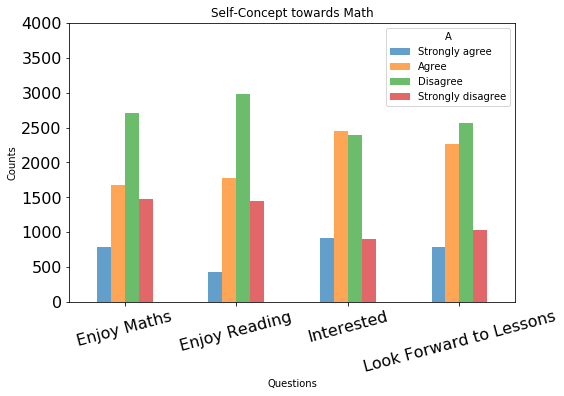

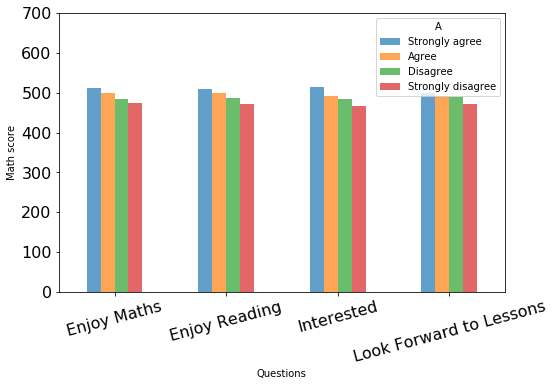

In [41]:
fig=plt.figure(figsize=[8,5])
ax=fig.add_axes([.125,.125,.775,.775])
df_interest_counts.plot(kind='bar',ax=ax,alpha=0.7)
plt.ylabel('Counts')
plt.xticks(rotation=15);
plt.xlabel('Questions');
plt.ylim(0,4000);
plt.title('Self-Concept towards Math')

fig=plt.figure(figsize=[8,5])
ax=fig.add_axes([.125,.125,.775,.775])
df_interest_MATH.plot(kind='bar',ax=ax,alpha=0.7)
plt.xticks(rotation=15)
plt.ylabel('Math score')
plt.ylim(0,700);
plt.xlabel('Questions');

### Math Work Ethic

In [42]:
#Math Work Ethic
#ST46Q01: Homework Completed in Time
#ST46Q02: Work Hard on Homework
#ST46Q03: Prepared for Exams
#ST46Q04: Study Hard for Quizzes
#ST46Q05: Study Until I Understand Everything
#ST46Q06: Pay Attention in Classes
#ST46Q07: Listen in Classes
#ST46Q08: Avoid Distractions When Studying
#ST46Q09: Keep Work Organized
work_ethic= ['ST46Q01','ST46Q02','ST46Q03','ST46Q04','ST46Q05','ST46Q06','ST46Q07','ST46Q08','ST46Q09']

In [43]:
df_ethic = df_usa[['ST46Q01','ST46Q02','ST46Q03','ST46Q04','ST46Q05','ST46Q06','ST46Q07','ST46Q08','ST46Q09','MATH']].copy()
df_ethic.dropna(axis=0,inplace=True)
df_ethic=df_ethic.rename(columns={'ST46Q01':'Homework Completed in Time',
'ST46Q02':'Work Hard on Homework',
'ST46Q03':'Prepared for Exams',
'ST46Q04':'Study Hard for Quizzes',
'ST46Q05':'Study Until I Understand Everything',
'ST46Q06':'Pay Attention in Classes',
'ST46Q07':'Listen in Classes',
'ST46Q08':'Avoid Distractions When Studying',
'ST46Q09':'Keep Work Organized'})
df_ethic.shape

(6532, 10)

In [44]:
df_ethic=pd.melt(df_ethic,id_vars='MATH',var_name='Q',value_name='A')

In [45]:
#count question answers
df_ethic_counts=df_ethic.groupby(['Q','A']).size().unstack()
cols=['Strongly agree','Agree','Disagree','Strongly disagree']
df_ethic_counts =df_ethic_counts[cols]

#calculate average math score
df_ethic_MATH=df_ethic.groupby(['Q','A'])['MATH'].mean().unstack()
df_ethic_MATH =df_ethic_MATH[cols]

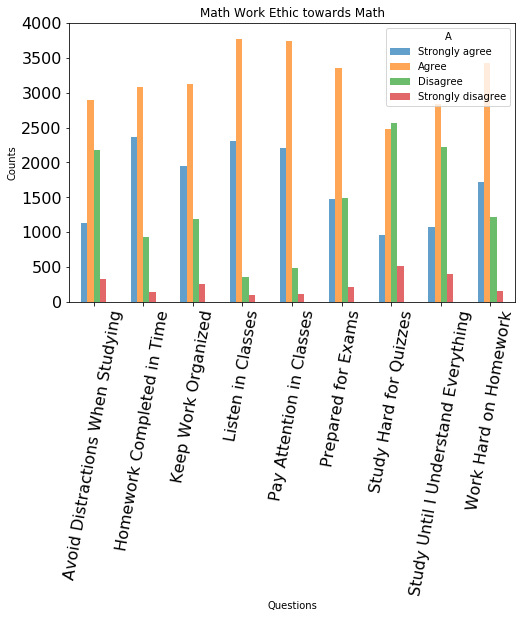

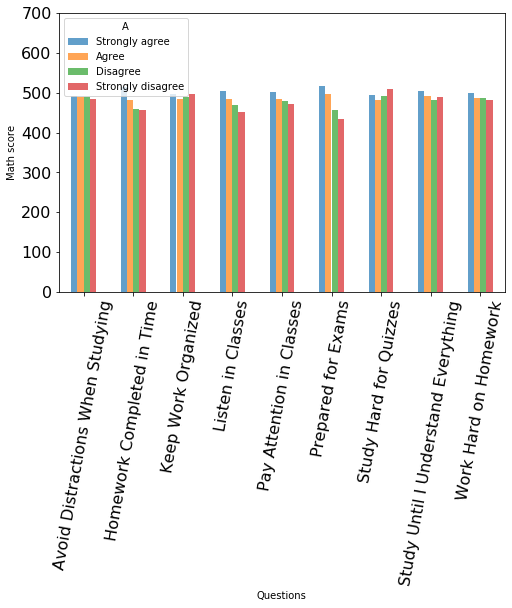

In [46]:
fig=plt.figure(figsize=[8,5])
ax=fig.add_axes([.125,.125,.775,.775])
df_ethic_counts.plot(kind='bar',ax=ax,alpha=0.7)
plt.ylabel('Counts')
plt.xticks(rotation=80);
plt.xlabel('Questions');
plt.ylim(0,4000);
plt.title('Math Work Ethic towards Math')

fig=plt.figure(figsize=[8,5])
ax=fig.add_axes([.125,.125,.775,.775])
df_ethic_MATH.plot(kind='bar',ax=ax,alpha=0.7)
plt.xticks(rotation=80)
plt.ylabel('Math score')
plt.ylim(0,700);
plt.xlabel('Questions');

### Math Behavior

In [47]:
#Math Behaviour
#ST49Q01: Talk about Maths with Friends
#ST49Q02: Help Friends with Maths
#ST49Q03: (Extracurricular) Activity
#ST49Q04: Participate in Competitions
#ST49Q05: Study More Than 2 Extra Hours a Day
#ST49Q06: Play Chess
#ST49Q07: Computer programming
#ST49Q09: Participate in Math Club
behavior=['ST49Q01','ST49Q02','ST49Q03','ST49Q04','ST49Q05','ST49Q06','ST49Q07','ST49Q09']

In [48]:
df_behavior = df_usa[['ST49Q01','ST49Q02','ST49Q03','ST49Q04','ST49Q05','ST49Q06','ST49Q07','ST49Q09','MATH']].copy()
df_behavior.dropna(axis=0,inplace=True)
df_behavior=df_behavior.rename(columns={'ST49Q01':'Talk about Maths with Friends',
'ST49Q02':'Help Friends with Maths',
'ST49Q03':'(Extracurricular) Activity',
'ST49Q04':'Participate in Competitions',
'ST49Q05':'Study More Than 2 Extra Hours a Day',
'ST49Q06':'Play Chess',
'ST49Q07':'Computer programming',
'ST49Q09':'Participate in Math Club'})
df_behavior.shape
df_behavior.head(5)

,Talk about Maths with Friends,Help Friends with Maths,(Extracurricular) Activity,Participate in Competitions,Study More Than 2 Extra Hours a Day,Play Chess,Computer programming,Participate in Math Club,MATH
0,Never or rarely,Often,Often,Never or rarely,Often,Often,Always or almost always,Never or rarely,456.69888
1,Sometimes,Sometimes,Sometimes,Never or rarely,Never or rarely,Never or rarely,Never or rarely,Never or rarely,421.88038
2,Sometimes,Sometimes,Never or rarely,Never or rarely,Never or rarely,Never or rarely,Never or rarely,Never or rarely,546.19880
3,Sometimes,Sometimes,Sometimes,Never or rarely,Never or rarely,Never or rarely,Never or rarely,Never or rarely,469.55134
5,Often,Sometimes,Never or rarely,Never or rarely,Never or rarely,Never or rarely,Never or rarely,Never or rarely,454.43994


In [49]:
df_behavior=pd.melt(df_behavior,id_vars='MATH',var_name='Q',value_name='A')
df_behavior.head()

,MATH,Q,A
0,456.69888,Talk about Maths with Friends,Never or rarely
1,421.88038,Talk about Maths with Friends,Sometimes
2,546.19880,Talk about Maths with Friends,Sometimes
3,469.55134,Talk about Maths with Friends,Sometimes
4,454.43994,Talk about Maths with Friends,Often


In [50]:
#count question answers
df_behavior_counts=df_behavior.groupby(['Q','A']).size().unstack()
cols=['Always or almost always', 'Often', 'Sometimes', 'Never or rarely']
df_behavior_counts =df_behavior_counts[cols]

#calculate average math score
df_behavior_MATH=df_behavior.groupby(['Q','A'])['MATH'].mean().unstack()
df_behavior_MATH =df_behavior_MATH[cols]

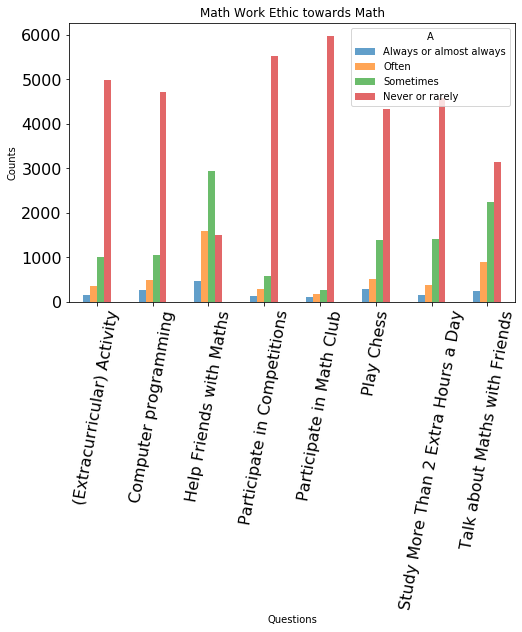

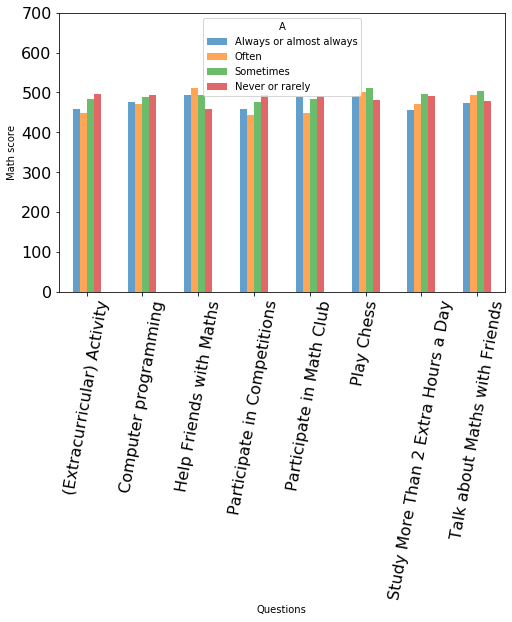

In [51]:
fig=plt.figure(figsize=[8,5])
ax=fig.add_axes([.125,.125,.775,.775])
df_behavior_counts.plot(kind='bar',ax=ax,alpha=0.7)
plt.ylabel('Counts')
plt.xticks(rotation=80);
plt.xlabel('Questions');
#plt.ylim(0,4000);
plt.title('Math Work Ethic towards Math')

fig=plt.figure(figsize=[8,5])
ax=fig.add_axes([.125,.125,.775,.775])
df_behavior_MATH.plot(kind='bar',ax=ax,alpha=0.7)
plt.xticks(rotation=80)
plt.ylabel('Math score')
plt.ylim(0,700);
plt.xlabel('Questions');

## Explanatory data analysis

In [52]:

df_usa_2 = df_usa.copy()
points_1={'Strongly agree':4,'Agree': 3,'Disagree': 2, 'Strongly disagree':1}
points_2={'Always or almost always': 4, 'Often':3, 'Sometimes':2, 'Never or rarely':1}

In [53]:
#define a function to convert categories to numbers
def score(categories, name, scale):
    for category in categories:
        df_usa_2.loc[:, category]=df_usa_2.loc[:,category].map(scale)
   
    df_usa_2[name]=df_usa_2.loc[:,categories].mean(axis=1)
    

In [54]:
score(motivation, 'Motivation',points_1)
score(anxiety, 'Anxiety', points_1)
score(self, 'Self_concept',points_1)
score(interest, 'Interest', points_1)
score(work_ethic, 'Work_ethic', points_1)
score(behavior, 'Behavior',points_2)


(178.38195103461715, 794.2929289653829)

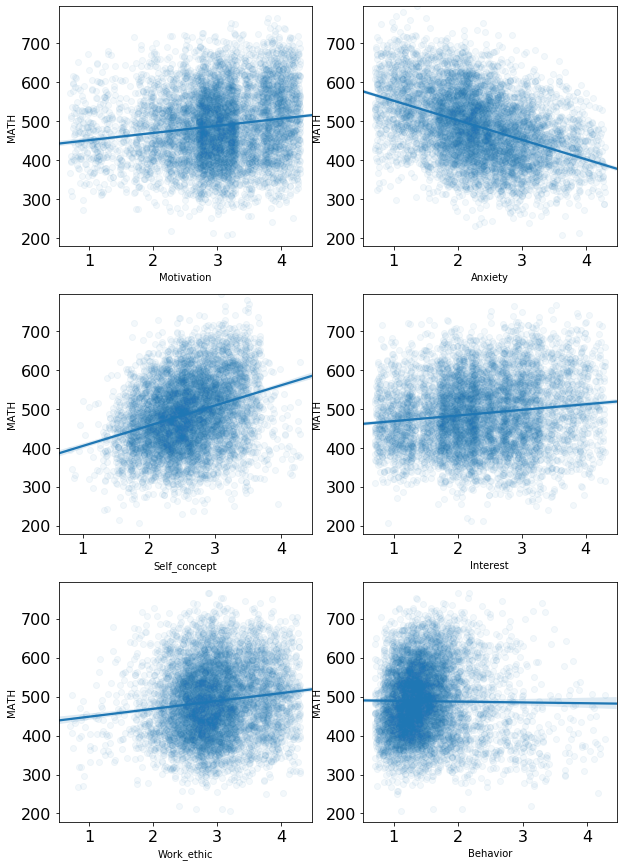

In [55]:
plt.figure(figsize=[10,15])

plt.subplot(3,2,1)
ax1=sns.regplot(data=df_usa_2, x='Motivation',y='MATH', x_jitter=0.3,
          scatter_kws={'alpha':1/20});

plt.subplot(3,2,2)
sns.regplot(data=df_usa_2, x='Anxiety',y='MATH', x_jitter=0.3,
          scatter_kws={'alpha':1/20})
plt.ylim(ax1.get_ylim())

plt.subplot(3,2,3)
sns.regplot(data=df_usa_2, x='Self_concept',y='MATH', x_jitter=0.3,
          scatter_kws={'alpha':1/20})
plt.ylim(ax1.get_ylim())

plt.subplot(3,2,4)
sns.regplot(data=df_usa_2, x='Interest',y='MATH', x_jitter=0.3,
          scatter_kws={'alpha':1/20})
plt.ylim(ax1.get_ylim())

plt.subplot(3,2,5)
sns.regplot(data=df_usa_2, x='Work_ethic',y='MATH', x_jitter=0.3,
          scatter_kws={'alpha':1/20})
plt.ylim(ax1.get_ylim())

plt.subplot(3,2,6)
sns.regplot(data=df_usa_2, x='Behavior',y='MATH', x_jitter=0.3,
          scatter_kws={'alpha':1/20})
plt.ylim(ax1.get_ylim())


Motivation, self-concept, interest and work-ethic have positive effect on math performance, and self-concept has the highest influence from the slope of the regression line. Anxitey has a negative effect, while behavior has no effect on the performance. So from the scatter plot and previous categories study, we get some useful insights about how to help student succeed in math study:
1. Strong confidence is important for their math study, they need to believe and ensure themselves that every can do well in math learning.
2. Self-doubt and axiety about math can significantly ruin their performance in math study and test, educator need to help them to understand enjoying the process of learning much more important than treating the study as a burden.

In summary, understanding the student feels and psychological activities is more important than passing on knowledge.

# Prediction
In this part, we will use machine learning to predict who will fail in the math test, and try to help me achieve better performance in the future. 

In [56]:
#set up the math edge based on math statistics
Math_edge=[]
Percentage = [0,0.10,0.25,0.50,0.75,0.90,1]
for i in Percentage:
    Math_edge.append(int(df_usa_2.MATH.quantile(i)))

Math_edge

[162, 372, 420, 482, 547, 607, 795]

In [57]:
#cut Math into six different level
Math_edge=[]
Percentage = [0,0.10,0.25,0.50,0.75,0.90,1]
for i in Percentage:
    Math_edge.append(int(df_usa_2.MATH.quantile(i)))


Math_level = ['L1','L2','L3','L4','L5','L6']
df_usa_2['Math_level']=pd.cut(df_usa_2['MATH'], Math_edge, labels=Math_level)


In [58]:
df_model = df_usa_2[['Math_level','MATH','ST29Q02','ST29Q05','ST29Q07','ST29Q08','ST42Q01','ST42Q03','ST42Q05','ST42Q08','ST42Q10','ST42Q02','ST42Q04','ST42Q06','ST42Q07','ST42Q09','ST29Q01','ST29Q03','ST29Q04','ST29Q06','ST46Q01','ST46Q02','ST46Q03','ST46Q04','ST46Q05','ST46Q06','ST46Q07','ST46Q08','ST46Q09','ST49Q01','ST49Q02','ST49Q03','ST49Q04','ST49Q05','ST49Q06','ST49Q07','ST49Q09']].copy()

In [59]:
df_model.head(2)

,Math_level,MATH,ST29Q02,ST29Q05,ST29Q07,ST29Q08,ST42Q01,ST42Q03,ST42Q05,ST42Q08,...,ST46Q08,ST46Q09,ST49Q01,ST49Q02,ST49Q03,ST49Q04,ST49Q05,ST49Q06,ST49Q07,ST49Q09
0,L3,456.69888,4.0,4.0,2.0,4.0,2.0,2.0,2.0,NaN,...,3.0,4.0,1.0,3.0,3.0,1.0,3.0,3.0,4.0,1.0
1,L3,421.88038,3.0,3.0,3.0,3.0,2.0,2.0,2.0,2.0,...,3.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0


In [60]:
df_model.dropna(axis=0,inplace=True)
df_model.shape

(3049, 37)

In [61]:
df_model.loc[df_model['Math_level']=='L1','pass']=0
df_model.loc[df_model['Math_level']=='L2','pass']=0
df_model.loc[df_model['Math_level']=='L3','pass']=0
df_model.loc[df_model['Math_level']=='L4','pass']=1
df_model.loc[df_model['Math_level']=='L5','pass']=1
df_model.loc[df_model['Math_level']=='L6','pass']=1

In [62]:
X=df_model.iloc[:,2:37]
y=df_model.iloc[:,-1]

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=25 )
y_test.value_counts()

0.0    383
1.0    380
Name: pass, dtype: int64

### Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report #importing logistic regression model

lr = LogisticRegression();
lr.fit(X_train,y_train);#fit or train data
print('Logistic Regression Score : ',lr.score(X_test,y_test))#Ratio of correct predictions

lr_accuracy=lr.score(X_test,y_test);


Logistic Regression Score :  0.7169069462647444


C:\Users\Hong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### K-Nearest Neighbor

In [65]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)

knn.fit(X_train,y_train)

print('K-Nearest Neighbors Score : ',knn.score(X_test,y_test))

knn_accuracy=knn.score(X_test,y_test)

K-Nearest Neighbors Score :  0.6526867627785059


### Supported Vector Machine

In [66]:
from sklearn.svm import SVC

svm = SVC(random_state = 1)

svm.fit(X_train,y_train)

print('Super Vector Machine Score : ',svm.score(X_test,y_test))

svm_accuracy=svm.score(X_test,y_test)

C:\Users\Hong\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Super Vector Machine Score :  0.7129750982961992


### Naive Bayes

In [67]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train,y_train)

print('Naive Bayes Score : ',nb.score(X_test,y_test))

nb_accuracy=nb.score(X_test,y_test)

Naive Bayes Score :  0.6684141546526867


### Decision Tree

In [68]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train,y_train)

print('Decision Tree Score : ',dt.score(X_test,y_test))

dt_accuracy=dt.score(X_test,y_test)

Decision Tree Score :  0.617300131061599


### Random Forest

In [69]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 22,random_state = 40)

rf.fit(X_train,y_train)

print('Random Forest Score : ',rf.score(X_test,y_test))

rf_accuracy=rf.score(X_test,y_test)

Random Forest Score :  0.6854521625163827


## Compare and Compound Classification Algorithms

In [70]:
pr_dict = [['Logistic Regression' , lr_accuracy],['KNN' , knn_accuracy],['SVM' , svm_accuracy],
           ['Naive Bayes' , nb_accuracy],['Decision Tree' , dt_accuracy],[ 'Random Forest' , rf_accuracy]]

all_predictions = pd.DataFrame(pr_dict,columns=['Classifier','Score'])

all_predictions

,Classifier,Score
0,Logistic Regression,0.716907
1,KNN,0.652687
2,SVM,0.712975
3,Naive Bayes,0.668414
4,Decision Tree,0.617300
5,Random Forest,0.685452


In [71]:
import numpy as np
from sklearn.metrics import confusion_matrix


def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

## Grid search and parameter optimization

### Logistic Regression

In [72]:
# Grid search cross validation
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X,y)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)


C:\Users\Hong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\Hong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\Hong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

C:\Users\Hong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Hong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this w

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l1'}


C:\Users\Hong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [73]:
#best parameters
logreg_cv.best_params_

{'C': 0.1, 'penalty': 'l1'}

C:\Users\Hong\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of LR Classifier: 0.7142857142857143
              precision    recall  f1-score   support

    Non pass       0.74      0.66      0.70       383
        Pass       0.69      0.77      0.73       380

    accuracy                           0.71       763
   macro avg       0.72      0.71      0.71       763
weighted avg       0.72      0.71      0.71       763



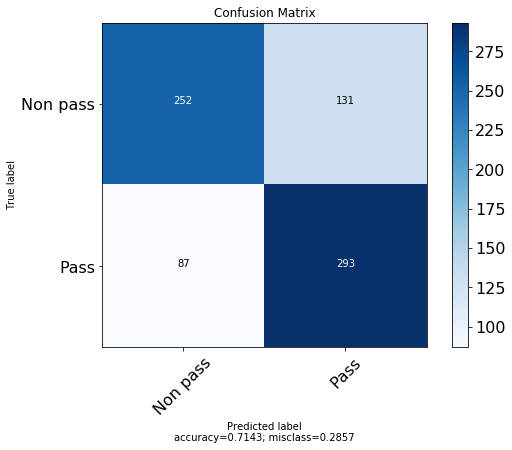

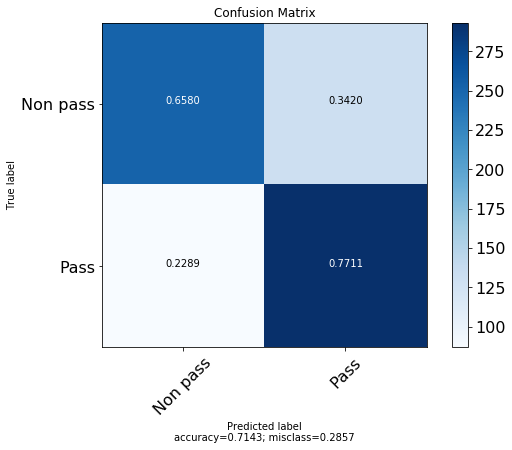

In [74]:
from sklearn.metrics import classification_report
logreg2=LogisticRegression(C=0.1,penalty="l1")
logreg2.fit(X_train,y_train)
logreg2_y_predict=logreg2.predict(X_test);
print('Accuracy of LR Classifier:', logreg2.score(X_test, y_test))
print(classification_report(y_test, logreg2_y_predict, target_names=['Non pass','Pass']))

logreg2_confusion = confusion_matrix(y_test, logreg2_y_predict)
plot_confusion_matrix(cm           = logreg2_confusion, 
                      normalize    = False,
                      target_names = ['Non pass', 'Pass'],
                      title        = "Confusion Matrix")
plot_confusion_matrix(cm           = logreg2_confusion, 
                      normalize    = True,
                      target_names = ['Non pass', 'Pass'],
                      title        = "Confusion Matrix")


### Supported Vector Machine

In [75]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]
clf = GridSearchCV(SVC(), tuned_parameters,cv=5)
clf.fit(X_train, y_train)
clf.best_params_
   

{'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}

Supported Vector Machine Score :  0.7208387942332897
Accuracy of SVM: 0.7208387942332897
              precision    recall  f1-score   support

    Non pass       0.77      0.63      0.69       383
        Pass       0.69      0.81      0.74       380

    accuracy                           0.72       763
   macro avg       0.73      0.72      0.72       763
weighted avg       0.73      0.72      0.72       763



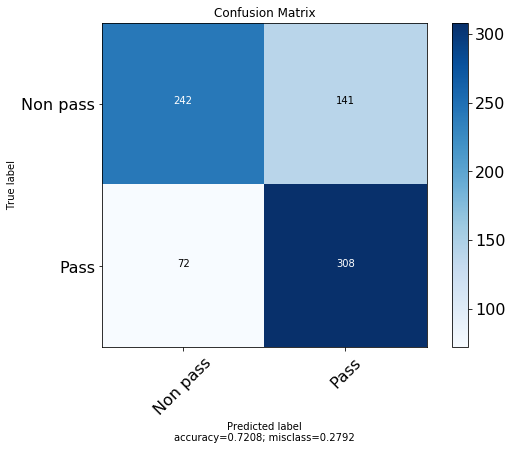

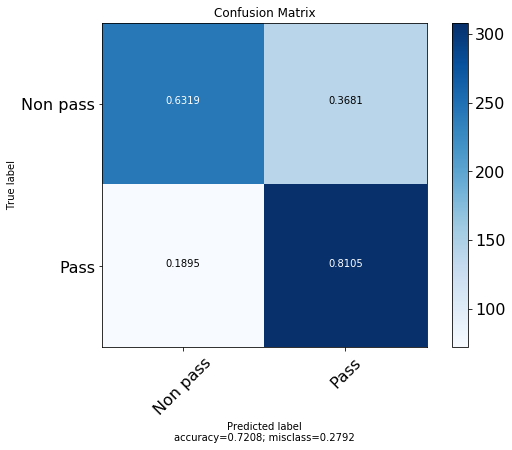

In [76]:
svm2 = SVC(C=1000, gamma= 0.001, kernel='rbf',random_state = 1)

svm2.fit(X_train,y_train)
svm2_y_predict=svm2.predict(X_test)
print('Supported Vector Machine Score : ',svm2.score(X_test,y_test))

print('Accuracy of SVM:', svm2.score(X_test, y_test))
print(classification_report(y_test, svm2_y_predict, target_names=['Non pass','Pass']))

svm2_confusion = confusion_matrix(y_test, svm2_y_predict)
plot_confusion_matrix(cm           = svm2_confusion, 
                      normalize    = False,
                      target_names = ['Non pass', 'Pass'],
                      title        = "Confusion Matrix")
plot_confusion_matrix(cm           = svm2_confusion, 
                      normalize    = True,
                      target_names = ['Non pass', 'Pass'],
                      title        = "Confusion Matrix")

## Conclusion:

With logistic regression, we could predict 63% students who have high chance to get low score in the math test. Based on previous data analysis, we proposed following suggestions for education insititutions to improve their academic performance:

1. Strong confidence is important for their math study, they need to believe and ensure themselves that every can do well in math learning.
2. Self-doubt and axiety about math can significantly ruin their performance in math study and test, educator need to help them to understand enjoying the process of learning much more important than treating the study as a burden.



## Appendix

In [80]:
df4=df_code.join(MATH.set_index('CNT'),on='CNT',how='outer')
#df4['MATH'].fillna(0,inplace=True)
df4.head(2)


,Country or area name,ISO ALPHA-3 code,CNT,NC,MATH
0,Afghanistan,AFG,Afghanistan,NaN,NaN
1,Åland Islands,ALA,Åland Islands,NaN,NaN


In [78]:
import plotly.plotly as py
import plotly.graph_objs as go
import pandas as pd

In [79]:
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)



data = [dict(
    type='choropleth',
    locations=df4['ISO ALPHA-3 code'],
    z=df4['MATH'],
    text=df4['Country or area name'],
   
   colorscale = 'Blues',
    autocolorscale=False,
    reversescale=True,
    marker=dict(
        line=dict(
            color='rgb(180,180,180)',
            width=0.5
        )),
    colorbar=dict(
        autotick=False,
        #tickprefix='$',
        title='Math score'),
)]

layout = dict(
    title='2012 PISA Math',
   
    geo=dict(
        showframe=False,
        showcoastlines=True,
        projection=dict(
            type='Mercator'
        )
    )
)

fig = dict(data=data, layout=layout)
iplot(fig,validate=False, filename='d3-world-map')

### Reference:

1.http://www.oecd.org/pisa/

2.https://www.worldbank.org

3.https://en.wikipedia.org/wiki/Programme_for_International_Student_Assessment
